In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
train_df = pd.read_csv('/content/sample_data/train.csv')
test_df  = pd.read_csv('/content/sample_data/test.csv')
test_df.head()
train_df.head()


,id,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,0,2.3859,15.0,3.827160,1.112100,1280.0,2.486989,34.60,-120.12,0.980
1,1,3.7188,17.0,6.013373,1.054217,1504.0,3.813084,38.69,-121.22,0.946
2,2,4.7750,27.0,6.535604,1.103175,1061.0,2.464602,34.71,-120.45,1.576
3,3,2.4138,16.0,3.350203,0.965432,1255.0,2.089286,32.66,-117.09,1.336
4,4,3.7500,52.0,4.284404,1.069246,1793.0,1.604790,37.80,-122.41,4.500


In [6]:
x = train_df.drop(columns=['MedHouseVal']).values
y = train_df['MedHouseVal'].values
x_mean=x.mean(axis=0)
x_std=x.std(axis=0)
x_scaled=(x-x_mean)/x_std

x_test=test_df.values
x_test_scaled=(x_test-x_mean)/x_std

x_train, x_val, y_train, y_val = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

print("Train split:", x_train.shape, "Validation split:", x_val.shape)
print("Test split:", x_test_scaled.shape)


Train split: (29709, 9) Validation split: (7428, 9)
Test split: (24759, 9)


In [7]:
class LinearRegression_from_scratch:
  def __init__(self,learning_rate,iterations):
    self.learning_rate=learning_rate
    self.iterations=iterations
    self.m=0.0
    self.b=0.0


  def fit(self,x,y):
    n_samples,n_features=x.shape
    self.m=np.zeros(n_features)
    self.b=0.0

    #gradient descent loop
    for i in range(self.iterations):
      predictions = x.dot(self.m) + self.b
      error = predictions - y
      dm = (1 / n_samples) * (x.T.dot(error))
      db = (1 / n_samples) * np.sum(error)
      # Update parameters
      self.m -= self.learning_rate * dm
      self.b -= self.learning_rate * db


  def predict(self,x):
    return x.dot(self.m) + self.b




In [8]:
model = LinearRegression_from_scratch(learning_rate=0.01, iterations=10000)
model.fit(x_train, y_train)

In [9]:
y_pred_val = model.predict(x_val)
rmse = np.sqrt(np.mean((y_val - y_pred_val) ** 2))
print(f"Validation RMSE: {rmse:.4f}")

Validation RMSE: 0.7482


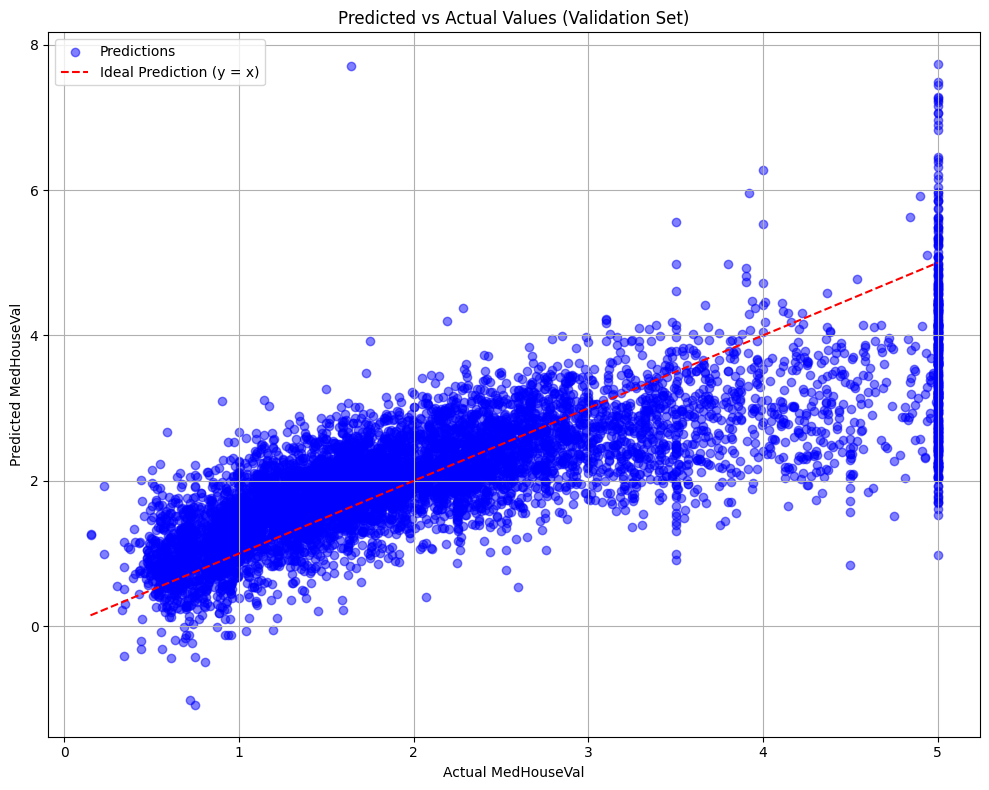

In [10]:
# Scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(y_val, y_pred_val, color='blue', alpha=0.5, label="Predictions")
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], color='red', linestyle='--', label="Ideal Prediction (y = x)")
plt.xlabel("Actual MedHouseVal")
plt.ylabel("Predicted MedHouseVal")
plt.title("Predicted vs Actual Values (Validation Set)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [11]:
# Retrain on full training data
model_full = LinearRegression_from_scratch(learning_rate=0.01,iterations=10000)
model_full.fit(x_scaled, y)

# Predict on test data
y_test_pred = model_full.predict(x_test_scaled)

In [12]:
submission = pd.DataFrame({'id': test_df.index,'MedHouseVal': y_test_pred})
submission.to_csv('submission.csv', index=False)
print("Submission file saved")
print(submission.tail())


Submission file saved
          id  MedHouseVal
24754  24754     2.164082
24755  24755     1.740417
24756  24756     1.334995
24757  24757     3.280495
24758  24758     3.104000
